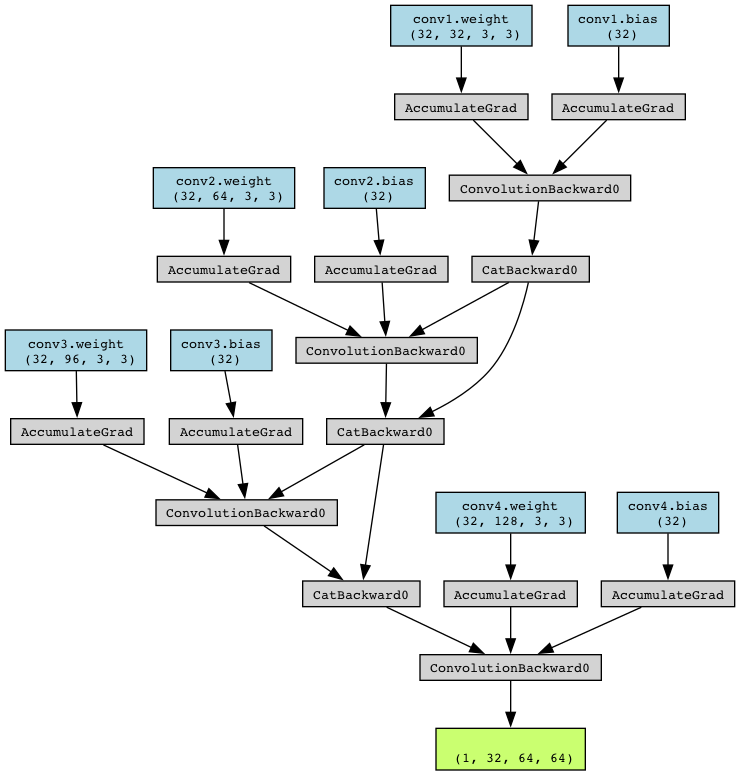

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot


class DilatedConvBlock(nn.Module):
    def __init__(self, split_channels=32, kernel_size=3):
        super(DilatedConvBlock, self).__init__()
        self.split_channels = split_channels
        self.kernel_size = kernel_size

        self.conv1 = nn.Conv2d(self.split_channels, self.split_channels, kernel_size=kernel_size, padding=1, dilation=1)
        self.conv2 = nn.Conv2d(self.split_channels * 2, self.split_channels, kernel_size=kernel_size, padding=2, dilation=2)
        self.conv3 = nn.Conv2d(self.split_channels * 3, self.split_channels, kernel_size=kernel_size, padding=4, dilation=4)
        self.conv4 = nn.Conv2d(self.split_channels * 4, self.split_channels, kernel_size=kernel_size, padding=8, dilation=8)

    def forward(self, x):
        out1 = self.conv1(x)  # First conv with dilation=1
        cat1 = torch.cat([x, out1], dim=1)

        out2 = self.conv2(cat1)  # dilation=2
        cat2 = torch.cat([cat1, out2], dim=1)

        out3 = self.conv3(cat2)  # dilation=4
        cat3 = torch.cat([cat2, out3], dim=1)

        out4 = self.conv4(cat3)  # dilation=8

        return out4


# Create dummy input
dummy_input = torch.randn(1, 32, 64, 64)  # Batch=1, Channels=32, H=W=64

# Instantiate model
model = DilatedConvBlock(split_channels=32)

# Forward pass to build graph
output = model(dummy_input)

# Visualize with torchviz
dot = make_dot(output, params=dict(list(model.named_parameters())))
dot.format = 'png'
dot.render('dilated_conv_block_graph', cleanup=False)

# To view in notebook (optional)
from IPython.display import Image
Image(filename='dilated_conv_block_graph.png')


In [ ]:
# self.conv1 = nn.Conv2d(16, 16, kernel_size=3, padding=1, dilation=1)
# self.conv2 = nn.Conv2d(16 * 2, 16, kernel_size=3, padding=2, dilation=2)
# self.conv3 = nn.Conv2d(16 * 3, 16, kernel_size=3, padding=4, dilation=4)
# self.conv4 = nn.Conv2d(16 * 4, 16, kernel_size=3, padding=8, dilation=8)